In [2]:
import muon
import scanpy as sc
from scipy.sparse import csr_matrix
import numpy as np

In [17]:
mudata = muon.read("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/mudata_with_embeddings_before_clustering.h5mu")

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(


In [18]:
to_keep = list(set(range(mudata["atac"].obsm["X_lsi"].shape[1])) - {0, 6})
mudata["atac"].obsm["X_lsi_red"] = mudata["atac"].obsm["X_lsi"][:,to_keep]

In [20]:
sc.pp.neighbors(mudata["atac"], use_rep="X_lsi_red")
sc.pp.neighbors(mudata["rna"])

In [21]:
muon.pp.neighbors(mudata)

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


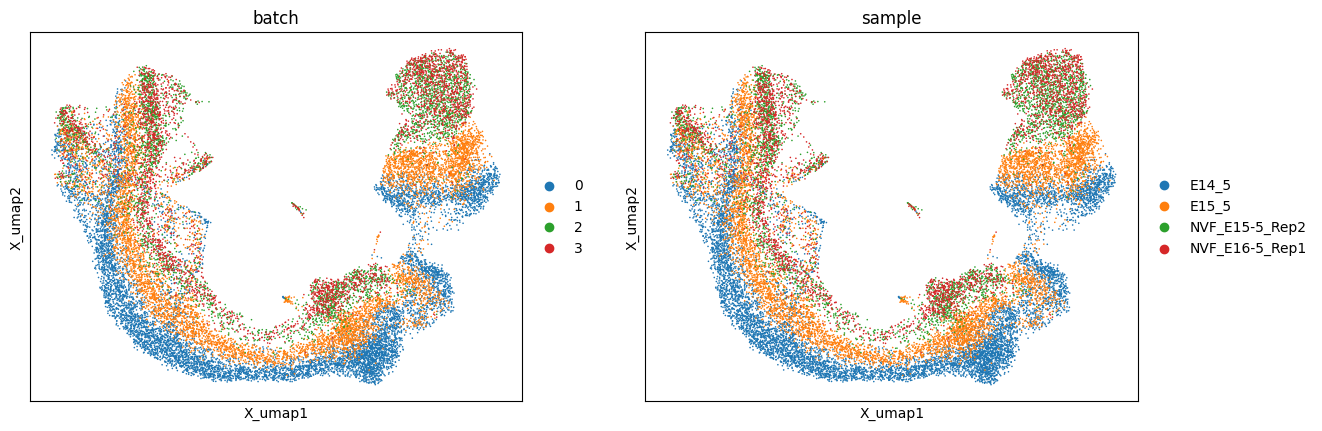

In [24]:
muon.tl.umap(mudata)
muon.pl.umap(mudata, color=["batch", "sample"])

In [26]:
sc.pp.neighbors(mudata["atac"], use_rep="X_lsi_red", metric='correlation', n_neighbors=int(np.sqrt(mudata.shape[0]) * 0.125))
sc.pp.neighbors(mudata["rna"], metric='correlation', n_neighbors=int(np.sqrt(mudata.shape[0]) * 0.125))

In [27]:
muon.pp.neighbors(mudata, metric='correlation', n_neighbors=int(np.sqrt(mudata.shape[0]) * 0.125))

/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/scvi-tools/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


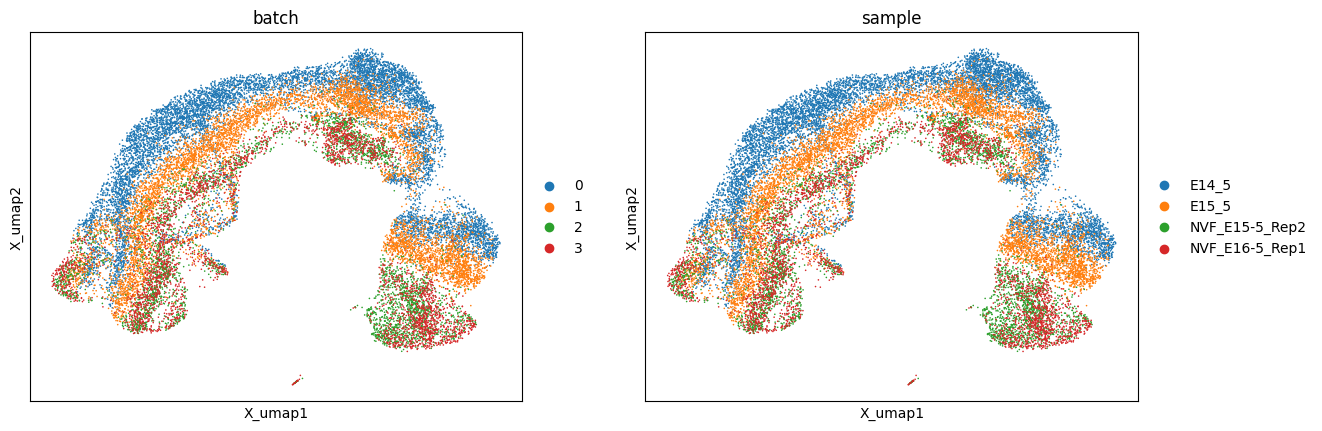

In [28]:
muon.tl.umap(mudata)
muon.pl.umap(mudata, color=["batch", "sample"])